In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

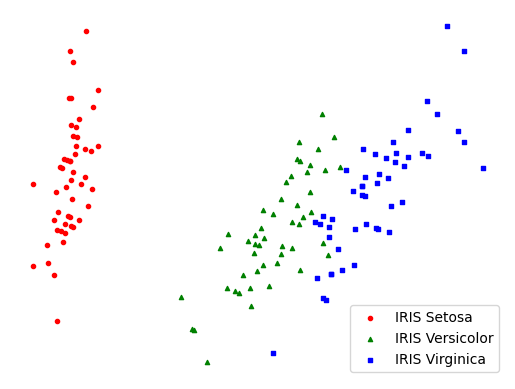

In [3]:
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [4]:
X_setosa = transformed[Y==0]
X_versicolor = transformed[Y==1]
X_virginica = transformed[Y==2]

In [5]:
X_train = pd.concat([X_setosa[:40], X_versicolor[:40], X_virginica[:40]], axis=0)
y_train = np.concatenate([Y[:40], Y[50:90], Y[100:140]], axis=0)

X_test = pd.concat([X_setosa[40:], X_versicolor[40:], X_virginica[40:]], axis=0)
y_test = np.concatenate([Y[40:50], Y[90:100], Y[140:150]], axis=0)

In [37]:
X_train = np.array(X_train.T)
X_test = np.array(X_test.T)
y_train = y_train.T
y_test = y_test.T

In [21]:
C = 3

from scipy import sparse
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# Y = convert_labels(y, C)

In [22]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [23]:
def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [24]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

In [25]:
# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

# W[-1] is the solution, W is all history of weights

In [39]:
eta = .05
d = X_train.shape[0]
W_init = np.random.randn(X_train.shape[0], C)
W = softmax_regression(X_train, y_train, W_init, eta)
print(W[-1])

[[-9.82478383  1.58138688  6.19483531]
 [ 2.22234027 -3.01552929  0.07383124]]


In [41]:
y_pred = pred(W[-1], X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])